# 1.7.1 Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((10*7,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\Calibration\iphone\*.png') #('.\Image\*.png')

In [5]:
len(images)

21

In [6]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (10,7),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,7), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#cv2.imshow('img',img)

## Calibration

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [9]:
mtx

array([[923.64556948,   0.        , 421.2122195 ],
       [  0.        , 920.66755316, 406.67935963],
       [  0.        ,   0.        ,   1.        ]])

In [10]:
dist

array([[-4.06691800e-01,  4.48445688e+00, -6.52037445e-05,
         1.01056446e-03, -1.79410503e+01]])

In [11]:
print(rvecs)

[array([[-0.34435985],
       [ 0.00803377],
       [-0.00225166]]), array([[-0.39731653],
       [-0.17148755],
       [-0.90266355]]), array([[-0.21003728],
       [-0.48956475],
       [-2.20658678]]), array([[ 0.019141  ],
       [-0.4240148 ],
       [-3.10373205]]), array([[-0.19024911],
       [ 0.35826539],
       [ 2.18534713]]), array([[-0.38256017],
       [ 0.24230458],
       [ 1.30102487]]), array([[-0.3283758 ],
       [ 0.2664977 ],
       [ 1.64638795]]), array([[-0.18451774],
       [ 0.11885366],
       [-0.0375872 ]]), array([[-0.46560406],
       [ 0.01049729],
       [-0.05676235]]), array([[ 0.11715427],
       [-0.12924201],
       [-0.0083348 ]]), array([[-0.1486492 ],
       [ 0.17146237],
       [-0.14616092]]), array([[-0.28733662],
       [-0.21325548],
       [-0.4610217 ]]), array([[ 0.31821702],
       [-0.08350586],
       [-1.53317509]]), array([[ 0.02401343],
       [-0.25251725],
       [-1.10847927]]), array([[-0.01200352],
       [ 0.09896266],
   

In [12]:
tvecs

[array([[-5.58157922],
        [-0.70057209],
        [28.713947  ]]),
 array([[-7.46687998],
        [ 4.6127673 ],
        [36.2900502 ]]),
 array([[-0.37619396],
        [ 7.99828837],
        [25.02432267]]),
 array([[ 1.85229324],
        [ 7.88717605],
        [34.98524086]]),
 array([[ 2.99119266],
        [ 3.27677642],
        [31.00267975]]),
 array([[ 0.14109239],
        [ 1.66797076],
        [38.77732033]]),
 array([[ 1.12112263],
        [-0.29471349],
        [29.82328319]]),
 array([[-5.89039173],
        [ 0.24740235],
        [28.67086509]]),
 array([[-5.83873428],
        [ 0.92931417],
        [32.62080901]]),
 array([[-5.76282755],
        [ 0.26795305],
        [29.82321712]]),
 array([[-8.67213948],
        [ 3.00803185],
        [34.32481714]]),
 array([[-5.57196525],
        [ 2.26934386],
        [33.23352273]]),
 array([[-1.40788217],
        [ 3.63204622],
        [24.77601264]]),
 array([[-1.80160357],
        [ 0.71321963],
        [24.61780199]]),
 array

## Undistortion

In [13]:
img = cv2.imread('./Calibration/iphone/sIMG_3518.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [14]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

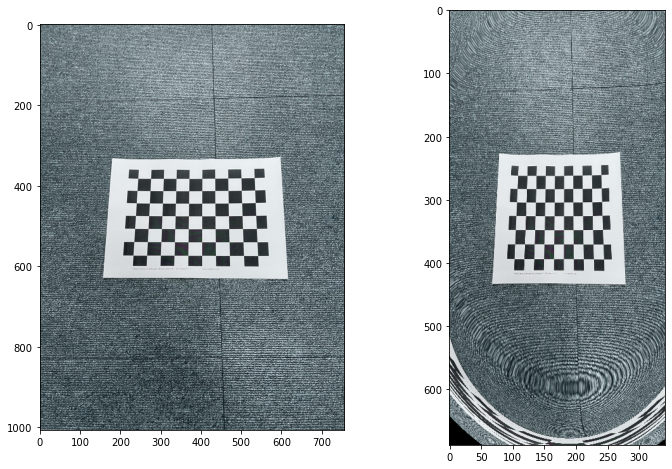

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [16]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

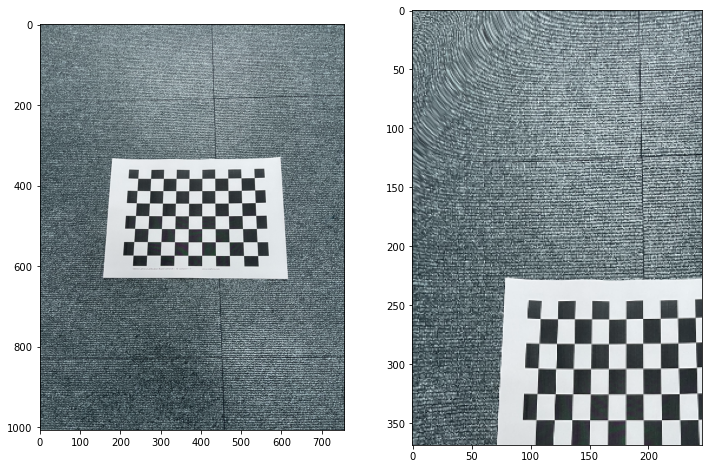

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [18]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.07548725149829337
